# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
global combined_data
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Call the function to initialize the global variable
# Now you can use the combined_data variable
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [92]:
# Check the number of unique mice
number_of_mice = combined_data["Mouse ID"]

# Print the number of mice
print(f"Number of unique mice: {number_of_mice}")

Number of unique mice: 0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object


In [93]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [94]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [95]:
# Create a clean DataFrame by dropping all duplicates in the DataFrame
cleaned_data = combined_data.drop_duplicates()
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [96]:
# Checkthe number of mice in the clean DataFrame
cleaned_number_of_mice = cleaned_data["Mouse ID"]
cleaned_number_of_mice

0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1892, dtype: object

In [97]:
# Checking the number of unique mice in the clean DataFrame without duplicated data
cleaned_number_of_mice = cleaned_data["Mouse ID"].nunique()
cleaned_number_of_mice

249

## Summary Statistics

In [98]:

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# Mean, median, variance, standard deviation, and SEM of the tumor volume
summary_stats = combined_data.groupby("Drug Regimen").agg(
    Mean_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Median_Tumor_Volume=("Tumor Volume (mm3)", "median"),
    Tumor_Volume_Variance=("Tumor Volume (mm3)", "var"),
    Tumor_Volume_Std_Dev=("Tumor Volume (mm3)", "std"),
    Tumor_Volume_Std_Err=("Tumor Volume (mm3)", "sem")
)
# Display the summary statistics table
summary_stats

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)

# Display the summary statistics table
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

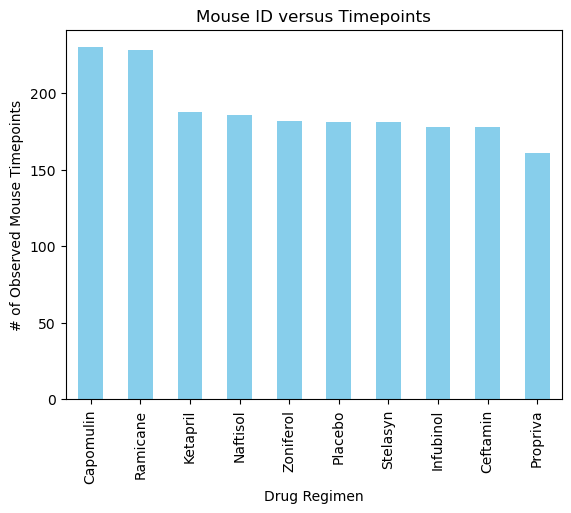

In [100]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_counts = combined_data['Drug Regimen'].value_counts()

# Generate a bar plot using Pandas
drug_regimen_counts.plot(kind='bar', 
                        title='Mouse ID versus Timepoints',
                        xlabel='Drug Regimen', 
                        ylabel='# of Observed Mouse Timepoints',
                        color='skyblue') # Optional: add color to the bars

# Display the plot
plt.show()




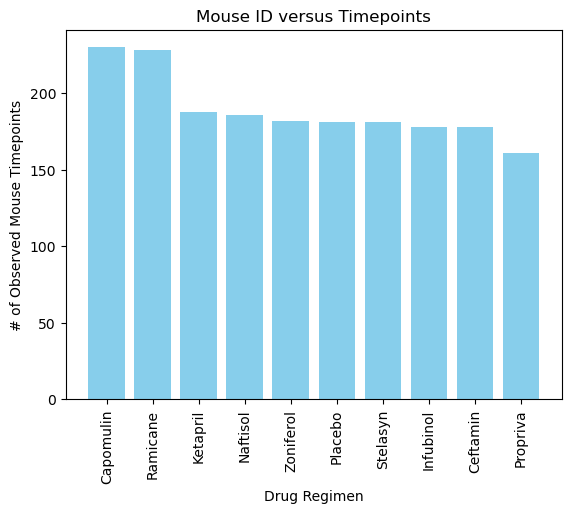

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Sort the counts in descending order
drug_regimen_counts = drug_regimen_counts.sort_values(ascending=False)

# Prepare the data for plotting
regimens = drug_regimen_counts.index  # x-values: Drug Regimens
counts = drug_regimen_counts.values   # y-values: Number of Rows

# Plot the data using Pyplot
plt.bar(regimens, counts, color='skyblue')

# Step 5: Customize the plot
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Mouse ID versus Timepoints')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Display the plot
plt.show()

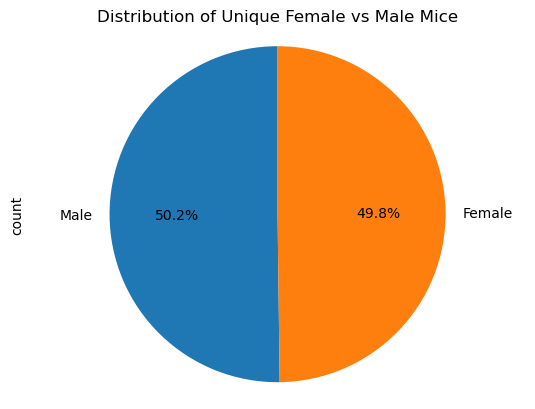

In [102]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Step 1: Get the unique mice with their gender
unique_mice = combined_data.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]

# Step 2: Count the number of male and female mice
gender_counts = unique_mice['Sex'].value_counts()

# Step 3: Generate the pie chart using Pandas
gender_counts.plot(kind='pie', 
                   autopct='%1.1f%%', 
                   startangle=90, 
                   title='Distribution of Unique Female vs Male Mice')

# Ensure the pie chart is a circle
plt.axis('equal')

# Display the plot
plt.show()


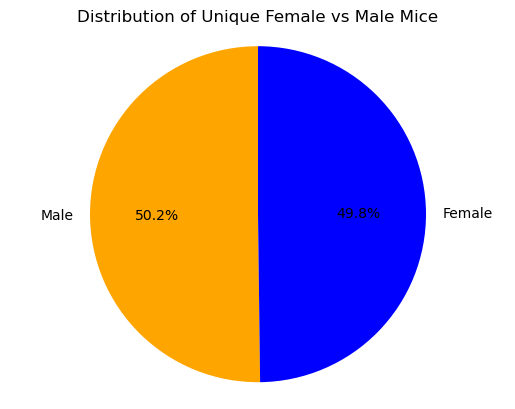

In [103]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Step 1: Get the unique mice with their gender
unique_mice = combined_data.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]

# Step 2: Count the number of male and female mice
gender_counts = unique_mice['Sex'].value_counts()

# Step 3: Make the pie chart using pyplot
plt.pie(gender_counts, 
        labels=gender_counts.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['Orange', 'blue'])

# Add a title
plt.title('Distribution of Unique Female vs Male Mice')

# Ensure the pie chart is a circle
plt.axis('equal')

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [104]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Step 1: Filter the data to include only the selected treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = combined_data[combined_data['Drug Regimen'].isin(selected_regimens)]

# Step 2: Find the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Step 3: Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the DataFrame to check the result
final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a275,Ceftamin,45,62.999356
3,a411,Ramicane,45,38.407618
4,a444,Ramicane,45,43.047543
...,...,...,...,...
95,y769,Ceftamin,45,68.594745
96,y793,Capomulin,45,31.896238
97,y865,Ceftamin,45,64.729837
98,z578,Ramicane,45,30.638696


In [105]:
# Step 1: Put treatments into a list for the loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 2: Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Step 3: Loop through the treatments to calculate the IQR and determine outliers
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Add the subset of tumor volumes to the list
    tumor_vol_data.append(drug_tumor_volumes)
    
    # Calculate the IQR
    quartiles = drug_tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using the upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = drug_tumor_volumes[(drug_tumor_volumes < lower_bound) | (drug_tumor_volumes > upper_bound)]
    
    # Print the results
    print(f"{drug}:")
    print(f"    Lower Quartile: {lowerq}")
    print(f"    Upper Quartile: {upperq}")
    print(f"    IQR: {iqr}")
    print(f"    Potential outliers: {outliers.values}\n")

Capomulin:
    Lower Quartile: 32.37735684
    Upper Quartile: 40.1592203
    IQR: 7.781863460000004
    Potential outliers: []

Ramicane:
    Lower Quartile: 31.56046955
    Upper Quartile: 40.65900627
    IQR: 9.098536719999998
    Potential outliers: []

Infubinol:
    Lower Quartile: 54.04860769
    Upper Quartile: 65.52574285
    IQR: 11.477135160000003
    Potential outliers: [36.3213458]

Ceftamin:
    Lower Quartile: 48.72207785
    Upper Quartile: 64.29983003
    IQR: 15.577752179999997
    Potential outliers: []



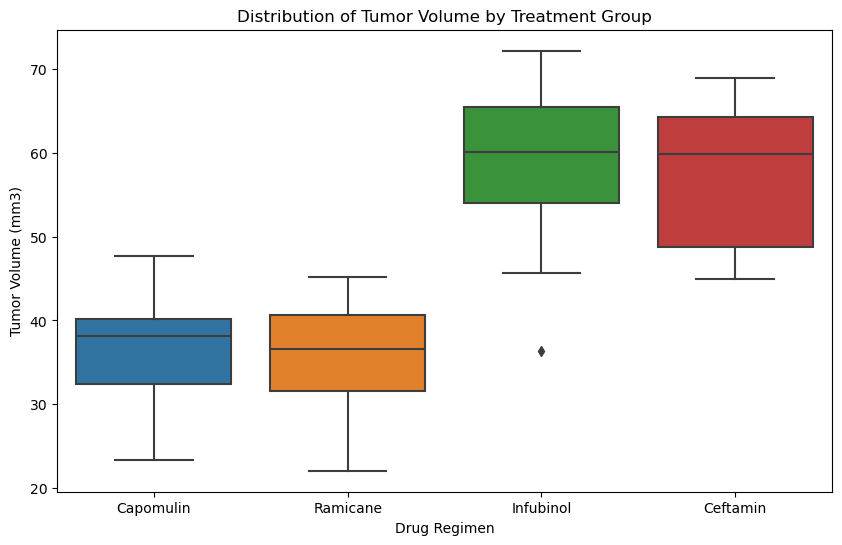

In [106]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Step 1: Put treatments into a list for the loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Step 2: Loop through the treatments to get tumor volumes
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Add the subset of tumor volumes to the list
    tumor_vol_data.append(drug_tumor_volumes)

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'Drug Regimen': np.repeat(treatments, [len(tv) for tv in tumor_vol_data]),
    'Tumor Volume (mm3)': np.concatenate(tumor_vol_data)
})

# Generate the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=plot_df)

# Add title and labels
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

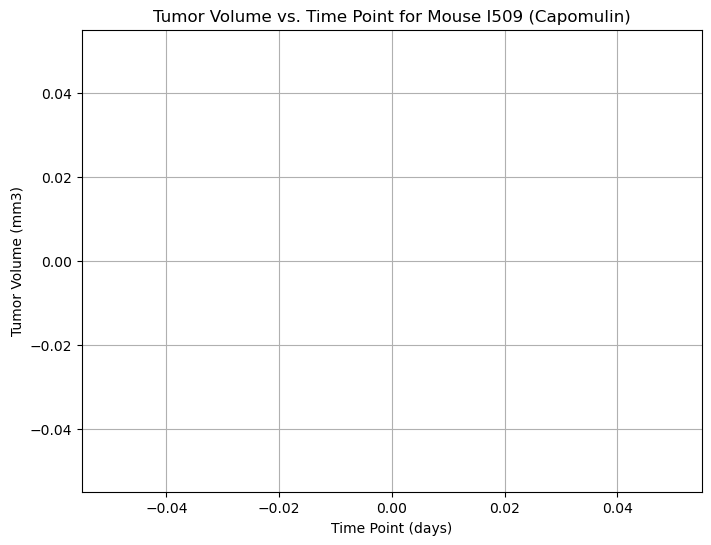

In [107]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Filter the data for a single mouse treated with Capomulin
mouse_id = "I509"  # Replace with the desired Mouse ID
capomulin_data = combined_data[(combined_data["Drug Regimen"] == "Capomulin") & (combined_data["Mouse ID"] == mouse_id)]

# Generate the line plot
plt.figure(figsize=(8, 6))
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], marker='o')
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()


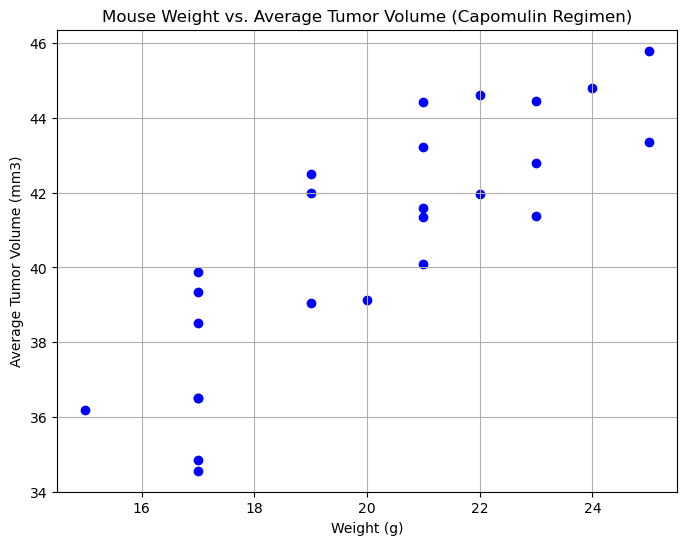

In [108]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Filter the data for the Capomulin regimen
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume with the mouse weight data
capomulin_avg_data = pd.merge(avg_tumor_volume, mouse_metadata[['Mouse ID', 'Weight (g)']], on="Mouse ID")

# Generate the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'], color='blue')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is: 0.84


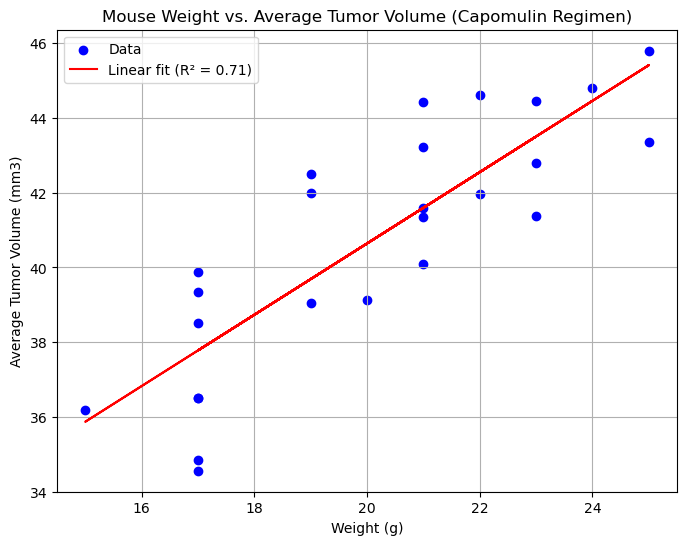

Slope: 0.95
Intercept: 21.55
R-squared: 0.71
P-value: 0.0000
Standard Error: 0.13


In [109]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Combine the data into a single DataFrame
#combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Filter the data for the Capomulin regimen
capomulin_data = combined_data[combined_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume with the mouse weight data
capomulin_avg_data = pd.merge(avg_tumor_volume, mouse_metadata[['Mouse ID', 'Weight (g)']], on="Mouse ID")

# Calculate the correlation coefficient
correlation = np.corrcoef(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])[0, 1]
print(f"The correlation coefficient between mouse weight and average tumor volume is: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])

# Plot the linear regression model
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'], color='blue', label='Data')
plt.plot(capomulin_avg_data['Weight (g)'], slope * capomulin_avg_data['Weight (g)'] + intercept, color='red', label=f'Linear fit (R² = {r_value**2:.2f})')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.legend()
plt.show()

# Print linear regression details
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.2f}")